# **VIRTUAL DRUG SCREENING**


# **01 - Prep Environtment**

## Instalasi

In [ ]:
! pip install chembl_webresource_client
! pip install lazypredict
! pip install jcopml==1.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.1 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.1.1-py2.py3-none-any.whl size=27509 sha256=18354140ad0a0cd9db82cf09ed77dd17a137f9b91baa1c5a13a419f3e7a5be3f
  Stored in directory: /root/.cache/pip/wheels/79/3f/d2/72357060b29488def73bceb49f653ca88a60a3ddac63cf7780
Successfully built jcopml


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 40.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn==0.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


In [ ]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

## Import

In [ ]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors, Lipinski

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from lightgbm import LGBMClassifier

from tqdm import tqdm

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.feature_importance import mean_score_decrease

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Pencarian Database Berdasarkan Kata Kunci Reseptor/Target

In [ ]:
target = new_client.target
target_query = target.search('BACE1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Beta-secretase 1,13.0,False,CHEMBL4822,"[{'accession': 'P56817', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Cricetulus griseus,Beta-secretase 1,13.0,False,CHEMBL3297642,"[{'accession': 'G3IAK4', 'component_descriptio...",SINGLE PROTEIN,10029
2,[],Mus musculus,Beta-secretase 1,11.0,False,CHEMBL4593,"[{'accession': 'P56818', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,Beta-secretase (BACE),11.0,False,CHEMBL2111390,"[{'accession': 'Q9Y5Z0', 'component_descriptio...",PROTEIN FAMILY,9606
4,[],Rattus norvegicus,Beta-secretase 1,11.0,False,CHEMBL3259473,"[{'accession': 'P56819', 'component_descriptio...",SINGLE PROTEIN,10116


## Filter berdasarkan HomoSapiens

In [ ]:
def targetFilter(x):
    selected_target = targets.target_chembl_id[x]
    activity = new_client.activity
    res = activity.filter(target_chembl_id=selected_target).filter(organism="Homo sapiens")
    df = pd.DataFrame.from_dict(res)
    return df

In [ ]:
df_1 = targetFilter(0)
df_2 = targetFilter(1)
df_3 = targetFilter(2)

## Menggabungkan semua data menjadi satu dataframe

In [ ]:
df = pd.concat([df_1, df_2, df_3], ignore_index = True)

In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Determined,35255,[],CHEMBL653504,Tested for inhibition of ranzyme B by the comp...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
1,None,Not Active,35269,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
2,None,Not Active,38924,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
3,None,Not Active,40011,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
4,None,Not Active,43619,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15923,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24359617,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5034195,Inhibition of BACE1 in mouse primary cortical ...,B,None,None,BAO_0000190,...,Mus musculus,Beta-secretase 1,10090,None,None,IC50,nM,UO_0000065,None,1210.0
15924,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24359618,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5034195,Inhibition of BACE1 in mouse primary cortical ...,B,None,None,BAO_0000190,...,Mus musculus,Beta-secretase 1,10090,None,None,IC50,nM,UO_0000065,None,2460.0
15925,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24359619,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5034195,Inhibition of BACE1 in mouse primary cortical ...,B,None,None,BAO_0000190,...,Mus musculus,Beta-secretase 1,10090,None,None,IC50,nM,UO_0000065,None,0.48100000000000004
15926,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24359620,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5034195,Inhibition of BACE1 in mouse primary cortical ...,B,None,None,BAO_0000190,...,Mus musculus,Beta-secretase 1,10090,None,None,IC50,nM,UO_0000065,None,0.309


In [ ]:
homo_sapiens_df = df[df['target_organism'] == 'Homo sapiens']
homo_sapiens_df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Determined,35255,[],CHEMBL653504,Tested for inhibition of ranzyme B by the comp...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
1,None,Not Active,35269,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
2,None,Not Active,38924,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
3,None,Not Active,40011,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
4,None,Not Active,43619,[],CHEMBL653506,Tested for inhibition of secreted beta-secreta...,B,None,None,BAO_0000179,...,Homo sapiens,Beta-secretase 1,9606,None,None,k obs / 1,M-1 s-1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625661,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,6000.0
15780,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625662,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1850.0
15781,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625663,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,22700.0
15782,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625664,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,3020.0


In [ ]:
dfIC50 = homo_sapiens_df[homo_sapiens_df['standard_type'] == 'IC50']
dfIC50

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
17,None,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
55,None,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
56,None,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
57,None,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
58,None,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625661,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,6000.0
15780,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625662,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,1850.0
15781,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625663,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,22700.0
15782,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25625664,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5364139,Inhibition of human BACE1 using E-EDANS-EVNLDA...,B,None,None,BAO_0000190,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,3020.0


dfIC50 = nilai minimum yang diperlukan suatu molekul untuk " apa gitu pokoknya" 50% dari molekul, berapa dosis yang diperlukan dri targetnya

## Menghapus data yang hilang dan duplikat

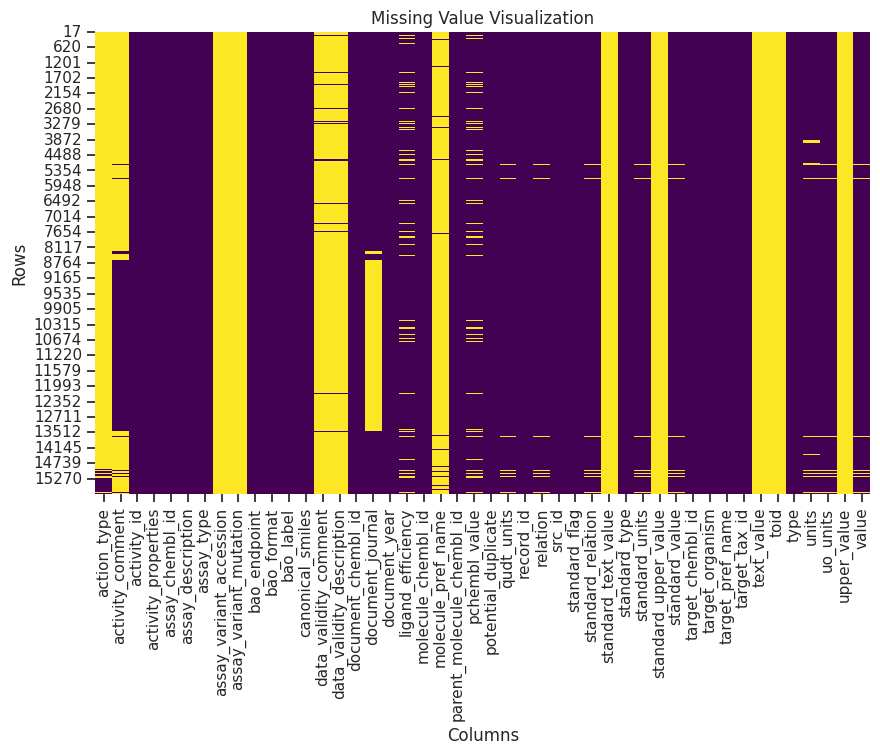

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(dfIC50.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

## Menyeleksi hanya 3 kolom

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_prep = dfIC50[selection]

In [ ]:
df_prep

,molecule_chembl_id,canonical_smiles,standard_value
17,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
55,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
56,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
57,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
58,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...
15779,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,6000.0
15780,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,1850.0
15781,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,22700.0
15782,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,3020.0


In [ ]:
df_prep = df_prep.dropna()
df_prep

,molecule_chembl_id,canonical_smiles,standard_value
17,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
55,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
56,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
57,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
58,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...
15779,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,6000.0
15780,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,1850.0
15781,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,22700.0
15782,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,3020.0


## Memberi label pada data

In [ ]:
df_prep_label = df_prep

In [ ]:
bioactivity_threshold = []
for i in df_prep_label['standard_value']:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [ ]:
df_prep_label

,molecule_chembl_id,canonical_smiles,standard_value
17,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
55,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
56,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
57,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
58,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...
15779,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,6000.0
15780,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,1850.0
15781,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,22700.0
15782,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,3020.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

In [ ]:
bioactivity_class = pd.DataFrame(bioactivity_class)
bioactivity_class

,class
0,active
1,active
2,active
3,intermediate
4,intermediate
...,...
10605,intermediate
10606,intermediate
10607,inactive
10608,intermediate


In [ ]:
df_label = pd.concat([df_prep_label.reset_index(drop=True),
                      bioactivity_class.reset_index(drop=True)],
                     axis=1)

In [ ]:
df_label

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate
...,...,...,...,...
10605,CHEMBL5434858,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,6000.0,intermediate
10606,CHEMBL5412274,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,1850.0,intermediate
10607,CHEMBL5432126,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,22700.0,inactive
10608,CHEMBL5427012,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,3020.0,intermediate


## Transform SMILES menjadi LIST

In [ ]:
df_no_smiles = df_label.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL406146,413.0,active
1,CHEMBL78946,2.0,active
2,CHEMBL324109,460.0,active
3,CHEMBL114147,9000.0,intermediate
4,CHEMBL419949,5600.0,intermediate
...,...,...,...
10605,CHEMBL5434858,6000.0,intermediate
10606,CHEMBL5412274,1850.0,intermediate
10607,CHEMBL5432126,22700.0,inactive
10608,CHEMBL5427012,3020.0,intermediate


In [ ]:
smiles = []

for i in df_label['canonical_smiles']:
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
# gabungnkan smiles dengan df_no_smiles dan buang kolom NaN
df_clean_smiles = pd.concat([smiles, df_no_smiles], axis=1)
df_clean_smiles

,canonical_smiles,molecule_chembl_id,standard_value,class
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,CHEMBL406146,413.0,active
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,CHEMBL78946,2.0,active
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL324109,460.0,active
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,CHEMBL114147,9000.0,intermediate
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,CHEMBL419949,5600.0,intermediate
...,...,...,...,...
10605,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,CHEMBL5434858,6000.0,intermediate
10606,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,CHEMBL5412274,1850.0,intermediate
10607,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,CHEMBL5432126,22700.0,inactive
10608,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,CHEMBL5427012,3020.0,intermediate


## Menghitung Lipinski Deskriptor

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
10605,601.788,5.3370,3.0,6.0
10606,559.707,4.1667,3.0,6.0
10607,587.761,4.3470,3.0,6.0
10608,571.762,5.1106,3.0,5.0


## Menggabungkan antara dataset dengan deskriptor lipinski

In [ ]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,canonical_smiles,molecule_chembl_id,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,CHEMBL406146,413.0,active,999.085,-1.4355,13.0,13.0
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,CHEMBL78946,2.0,active,893.005,-1.7361,12.0,12.0
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL324109,460.0,active,751.988,2.3535,8.0,9.0
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,CHEMBL114147,9000.0,intermediate,737.895,1.9626,8.0,8.0
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,CHEMBL419949,5600.0,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...
10605,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,CHEMBL5434858,6000.0,intermediate,601.788,5.3370,3.0,6.0
10606,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,CHEMBL5412274,1850.0,intermediate,559.707,4.1667,3.0,6.0
10607,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,CHEMBL5432126,22700.0,inactive,587.761,4.3470,3.0,6.0
10608,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,CHEMBL5427012,3020.0,intermediate,571.762,5.1106,3.0,5.0


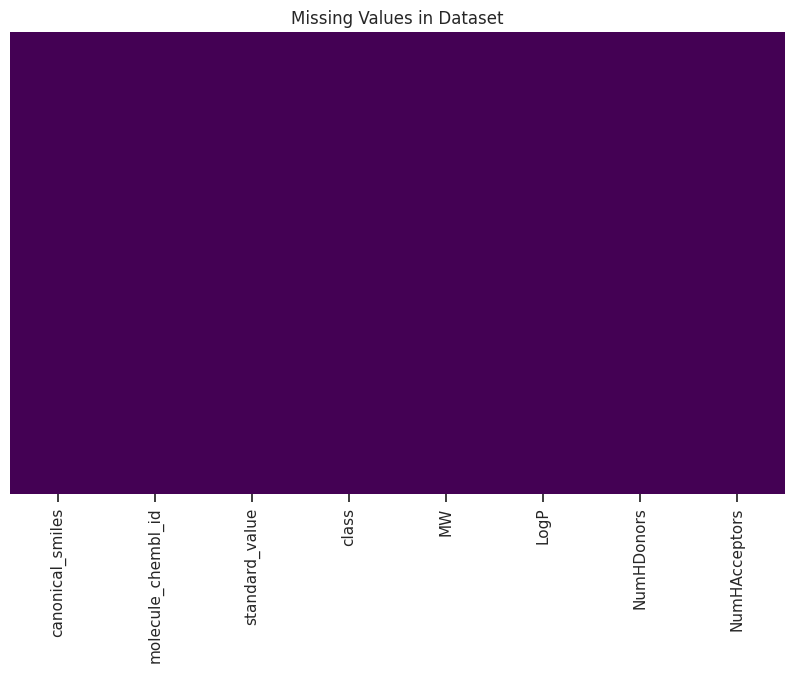

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_value(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Values in Dataset')
    plt.show()

plot_missing_value(df_combined)

## Konversi IC50 menjadi pIC50

In [ ]:
import pandas as pd
import numpy as np

# Fungsi untuk menghitung pIC50
def pIC50(input):
    # Membuat list untuk pIC50
    pIC50 = []

    # Mengonversi nilai standard_value ke pIC50
    for i in input['standard_value']:
        if pd.isna(i):  # Menangani nilai NaN
            pIC50.append(np.nan)
        else:
            molar = i * (10**-9)  # Mengonversi nM ke M
            pIC50.append(-np.log10(molar))  # Menghitung pIC50

    # Menambahkan kolom pIC50 ke DataFrame
    input['pIC50'] = pIC50

    # Menghapus kolom 'standard_value' jika tidak dibutuhkan
    input = input.drop('standard_value', axis='columns')

    return input

# Fungsi untuk normalisasi nilai pada 'standard_value'
def norm_value(input):
    # Pastikan kolom 'standard_value' sudah numerik
    input['standard_value'] = pd.to_numeric(input['standard_value'], errors='coerce')

    # List untuk nilai yang sudah dinormalisasi
    norm = []

    # Menormalkan nilai 'standard_value'
    for i in input['standard_value']:
        if pd.isna(i):  # Menangani NaN jika ada
            norm.append(np.nan)
        else:
            if i > 100000000:  # Pembatasan nilai lebih besar dari 100000000
                i = 100000000
            norm.append(i)

    # Menyimpan nilai yang telah dinormalisasi pada kolom 'standard_value'
    input['standard_value'] = norm

    return input

In [ ]:
print(df_combined.columns)

Index(['canonical_smiles', 'molecule_chembl_id', 'standard_value', 'class',
       'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'],
      dtype='object')


In [ ]:
df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)
df_final

,canonical_smiles,molecule_chembl_id,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,CHEMBL406146,active,999.085,-1.4355,13.0,13.0,6.384050
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,CHEMBL78946,active,893.005,-1.7361,12.0,12.0,8.698970
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL324109,active,751.988,2.3535,8.0,9.0,6.337242
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,CHEMBL114147,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,CHEMBL419949,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
10605,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,CHEMBL5434858,intermediate,601.788,5.3370,3.0,6.0,5.221849
10606,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,CHEMBL5412274,intermediate,559.707,4.1667,3.0,6.0,5.732828
10607,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,CHEMBL5432126,inactive,587.761,4.3470,3.0,6.0,4.643974
10608,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,CHEMBL5427012,intermediate,571.762,5.1106,3.0,5.0,5.519993


## Menghapus kelas 'intermediet class'

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,canonical_smiles,molecule_chembl_id,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,CHEMBL406146,active,999.085,-1.4355,13.0,13.0,6.384050
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,CHEMBL78946,active,893.005,-1.7361,12.0,12.0,8.698970
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL324109,active,751.988,2.3535,8.0,9.0,6.337242
5,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL116826,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,CHEMBL143239,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
10596,CC(C)=CC(O)C/C(C)=C/COc1c2ccoc2cc2oc(=O)ccc12,CHEMBL258939,inactive,354.402,4.5815,1.0,5.0,4.584860
10599,CCCN1CCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,CHEMBL5415222,active,587.761,4.9469,3.0,6.0,6.420216
10600,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,CHEMBL5399890,active,545.680,3.8245,4.0,6.0,6.040959
10604,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,CHEMBL5409955,inactive,616.803,4.0985,3.0,7.0,4.280669


In [ ]:
df_2class.isna().sum()

,0
canonical_smiles,0
molecule_chembl_id,0
class,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [ ]:
df_2class.to_csv('01_label2class_sars.csv', index=False)

## PLOTTING

### Plot frekuensi dari dua kelas bioaktifitas

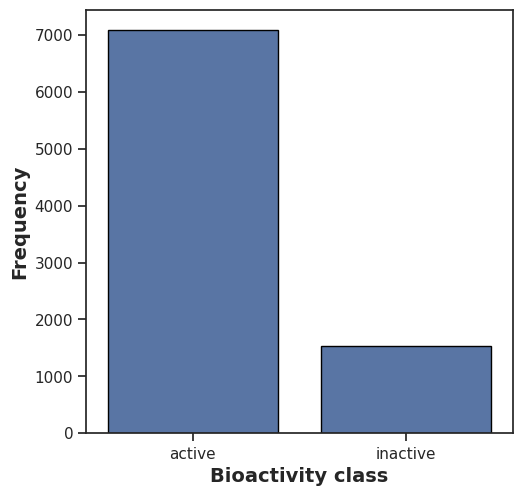

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot MW vs LogP

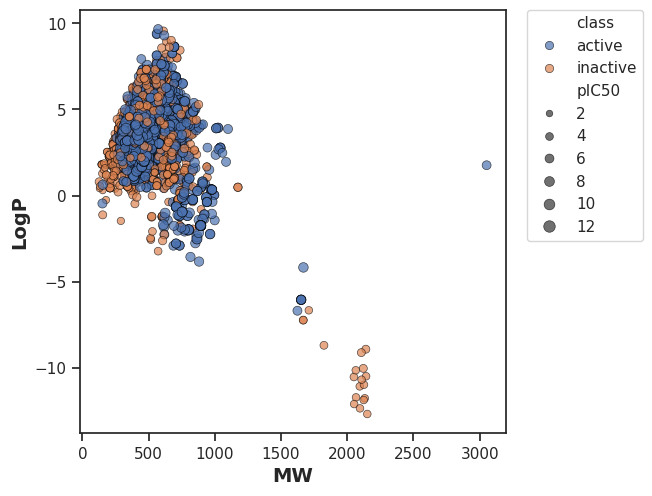

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### pIC50 Value Boxplots

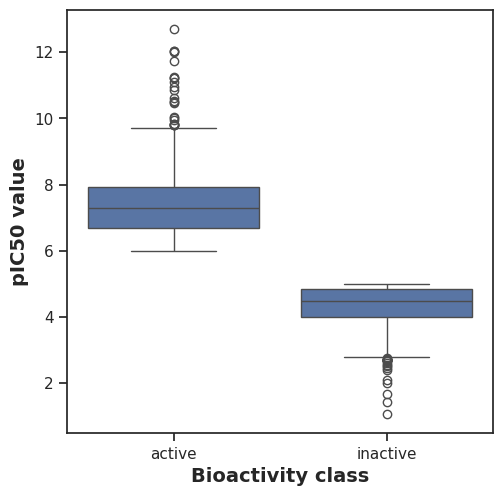

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### **Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,10826430.0,0.0,0.05,Different distribution (reject H0)


### MW

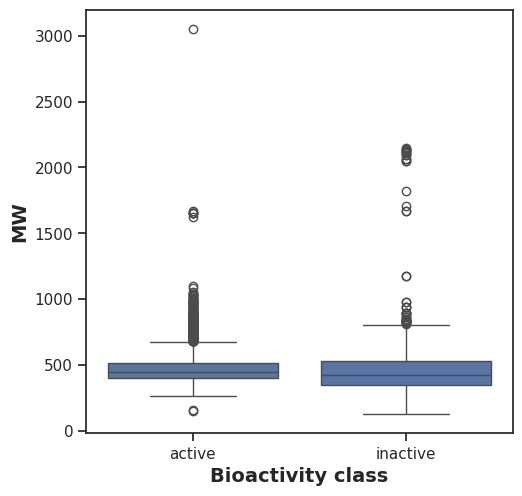

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6313034.5,1.889174e-24,0.05,Different distribution (reject H0)


### LogP

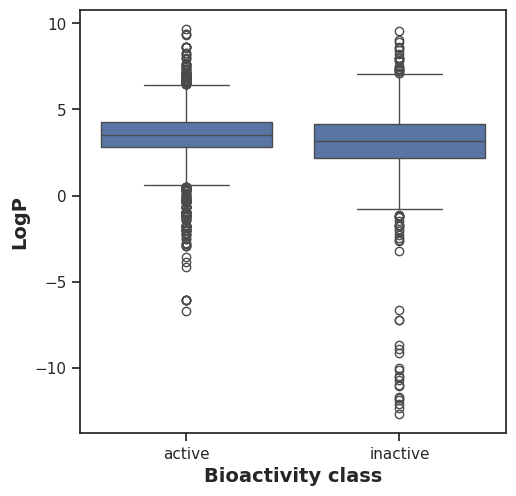

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6187081.5,1.689685e-18,0.05,Different distribution (reject H0)


### NumHDonors

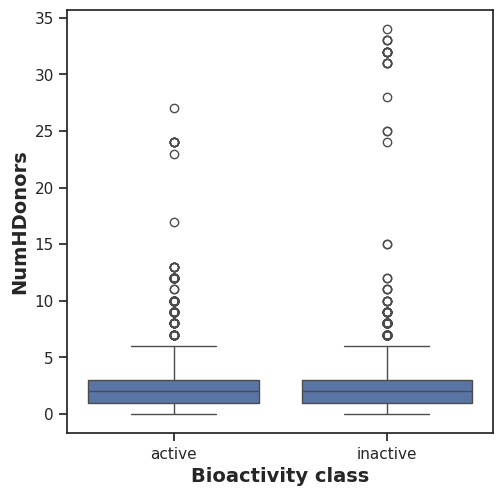

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5210131.5,0.015827,0.05,Different distribution (reject H0)


### NumHAcceptors

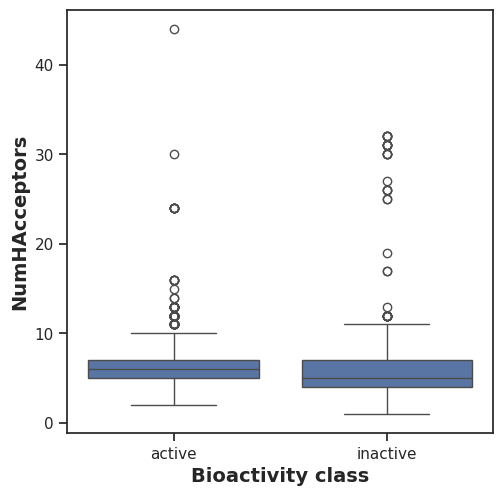

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6352569.5,1.466216e-27,0.05,Different distribution (reject H0)


# **02 - Fingerprint Generation**

## Padel Descriptor

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_combined[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
df_selection

,canonical_smiles,molecule_chembl_id
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,CHEMBL406146
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,CHEMBL78946
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL324109
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,CHEMBL114147
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,CHEMBL419949
...,...,...
10605,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,CHEMBL5434858
10606,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,CHEMBL5412274
10607,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,CHEMBL5432126
10608,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,CHEMBL5427012


In [ ]:
! cat molecule.smi | head -5

CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O)O)C(C)C)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(=O)O	CHEMBL406146
CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O)O)C(C)C)[C@@H](O)C[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(=O)O	CHEMBL78946
CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H](O)CC(=O)NC(CCSC)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C	CHEMBL324109
CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C	CHEMBL114147
CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C	CHEMBL419949


In [ ]:
! cat molecule.smi | wc -l

10610


ada 10610 senyawa

In [ ]:
with open("molecule.smi", "r") as f:
    smiles_list = f.readlines()

In [ ]:
smiles_list

['CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O)O)C(C)C)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(=O)O\tCHEMBL406146\n',
 'CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O)O)C(C)C)[C@@H](O)C[C@@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(=O)O\tCHEMBL78946\n',
 'CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H](O)CC(=O)NC(CCSC)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C\tCHEMBL324109\n',
 'CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C\tCHEMBL114147\n',
 'CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C\tCHEMBL419949\n',
 'CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H](O)CC(=O)NC(CC[S+](C)[O-])[C@@H](O)CC(=O)N[C@H](C(=O)NCc1ccc(C(=O)O)cc1)C(C)C\tCHEMBL116826\n',
 'CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c1)NC(=O)C(

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Baca file SMILES
smiles_file = "molecule.smi"
with open(smiles_file, "r") as f:
    smiles_list = [line.strip() for line in f]

# Inisialisasi DataFrame
data = []

# Proses setiap SMILES
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Buat fingerprint (contoh: Morgan Fingerprint dengan radius=2)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        # Convert fingerprint menjadi list
        fp_list = list(fp)
        # Tambahkan SMILES dan fingerprint ke dalam data
        data.append({"SMILES": smiles, "Fingerprint": fp_list})
    else:
        print(f"Error membaca SMILES: {smiles}")

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Ekspansi fingerprint ke kolom terpisah
fingerprint_df = pd.DataFrame(df["Fingerprint"].to_list(), columns=[f"Bit_{i}" for i in range(2048)])
final_df = pd.concat([df.drop("Fingerprint", axis=1), fingerprint_df], axis=1)

# Simpan ke file CSV (opsional)
final_df.to_csv("fingerprints.csv", index=False)

# Tampilkan DataFrame
print(final_df)

Output streaming akan dipotong hingga 5000 baris terakhir.
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerator
[11:32:59] DEPRECATION WARNING: please use MorganGenerat

                                                  SMILES  Bit_0  Bit_1  Bit_2  \
0      CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...      0      1      0   
1      CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...      0      1      0   
2      CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...      0      1      0   
3      CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...      0      1      1   
4      CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...      0      1      1   
...                                                  ...    ...    ...    ...   
10605  CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...      0      1      1   
10606  CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...      0      1      0   
10607  CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...      0      1      0   
10608  CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...      0      1      0   
10609  CCCN1CCCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...      0      1      1   

       Bit_3  Bit_4  Bit_5 

### Menggabungkan Fingerprint dan dataframe class

In [ ]:
df_X = pd.read_csv('fingerprints.csv')

In [ ]:
df_final_combined = pd.concat([df_X,df_combined], axis=1)

In [ ]:
df_final_combined

,SMILES,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2047,canonical_smiles,molecule_chembl_id,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,0,1,0,0,0,0,0,0,0,...,0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,CHEMBL406146,413.0,active,999.085,-1.4355,13.0,13.0,6.384050
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,0,1,0,0,0,0,0,0,0,...,0,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,CHEMBL78946,2.0,active,893.005,-1.7361,12.0,12.0,8.698970
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,0,1,0,0,0,0,0,0,0,...,0,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,CHEMBL324109,460.0,active,751.988,2.3535,8.0,9.0,6.337242
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,0,1,1,0,0,0,0,0,0,...,0,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,CHEMBL114147,9000.0,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,0,1,1,0,0,0,0,0,0,...,0,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,CHEMBL419949,5600.0,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10605,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,0,1,1,0,0,0,0,0,0,...,0,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,CHEMBL5434858,6000.0,intermediate,601.788,5.3370,3.0,6.0,5.221849
10606,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,0,1,0,0,0,0,0,0,0,...,0,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,CHEMBL5412274,1850.0,intermediate,559.707,4.1667,3.0,6.0,5.732828
10607,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,0,1,0,0,0,0,0,0,0,...,0,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,CHEMBL5432126,22700.0,inactive,587.761,4.3470,3.0,6.0,4.643974
10608,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,0,1,0,0,0,0,0,0,0,...,0,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,CHEMBL5427012,3020.0,intermediate,571.762,5.1106,3.0,5.0,5.519993


Bit fingerprint adalah representasi dari struktur molekul smilesnya

In [ ]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
df_2class_prep = pd.read_csv('01_label2class_sars.csv')

In [ ]:
selection1= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
df_Y = df_2class_prep [selection1]
df_Y

,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,6.384050,999.085,-1.4355,13.0,13.0
1,8.698970,893.005,-1.7361,12.0,12.0
2,6.337242,751.988,2.3535,8.0,9.0
3,4.468521,767.987,1.3690,8.0,9.0
4,7.698970,717.722,4.3196,7.0,7.0
...,...,...,...,...,...
8612,4.584860,354.402,4.5815,1.0,5.0
8613,6.420216,587.761,4.9469,3.0,6.0
8614,6.040959,545.680,3.8245,4.0,6.0
8615,4.280669,616.803,4.0985,3.0,7.0


In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,SMILES,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.384050,999.085,-1.4355,13.0,13.0
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8.698970,893.005,-1.7361,12.0,12.0
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.337242,751.988,2.3535,8.0,9.0
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,4.468521,767.987,1.3690,8.0,9.0
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,7.698970,717.722,4.3196,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10605,CCCN1CCCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
10606,CCCN1CCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2c...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
10607,CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
10608,CCCN1CCCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c2...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


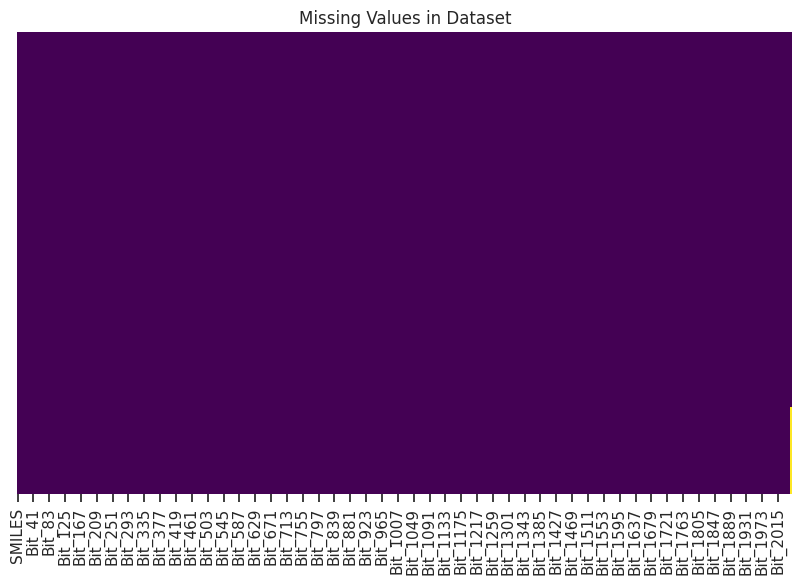

In [ ]:
plot_missing_value(dataset)

In [ ]:
dataset.isna().sum()

,0
SMILES,0
Bit_0,0
Bit_1,0
Bit_2,0
Bit_3,0
...,...
pIC50,1993
MW,1993
LogP,1993
NumHDonors,1993


In [ ]:
dataset=dataset.dropna()
dataset

,SMILES,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.384050,999.085,-1.4355,13.0,13.0
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8.698970,893.005,-1.7361,12.0,12.0
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.337242,751.988,2.3535,8.0,9.0
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,4.468521,767.987,1.3690,8.0,9.0
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,7.698970,717.722,4.3196,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,COc1ccc(C(=O)Nc2cc(F)c(F)c([C@]3(C)C[C@@H](C(F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.584860,354.402,4.5815,1.0,5.0
8613,Cc1cc(NC(=O)c2ccc(Cl)cn2)cc([C@]2(CF)C[C@@H](C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.420216,587.761,4.9469,3.0,6.0
8614,Cc1cc(NC(=O)c2ccc(C#N)cn2)cc([C@]2(CF)C[C@@H](...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.040959,545.680,3.8245,4.0,6.0
8615,COc1cnc(C(=O)Nc2cc(C)c(F)c([C@]3(CF)C[C@@H](C(...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.280669,616.803,4.0985,3.0,7.0


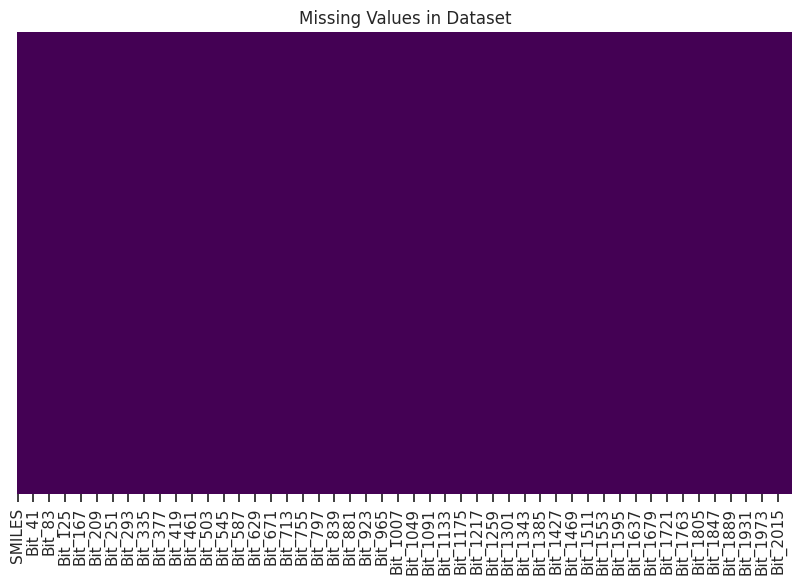

In [ ]:
plot_missing_value(dataset)

In [ ]:
dataset.isna().sum()

,0
SMILES,0
Bit_0,0
Bit_1,0
Bit_2,0
Bit_3,0
...,...
pIC50,0
MW,0
LogP,0
NumHDonors,0


### Mengecek low variance

In [ ]:
selection2= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
lipinski = dataset [selection2]
lipinski.head()

,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,6.384050,999.085,-1.4355,13.0,13.0
1,8.698970,893.005,-1.7361,12.0,12.0
2,6.337242,751.988,2.3535,8.0,9.0
3,4.468521,767.987,1.3690,8.0,9.0
4,7.698970,717.722,4.3196,7.0,7.0


In [ ]:
variance = dataset.drop(columns= ['pIC50',  'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'], axis=1)
variance.head()

,SMILES,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
variance.columns = variance.columns.astype(str)

In [ ]:
fix = pd.concat([variance,lipinski], axis=1)
fix

,SMILES,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.384050,999.085,-1.4355,13.0,13.0
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8.698970,893.005,-1.7361,12.0,12.0
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.337242,751.988,2.3535,8.0,9.0
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,4.468521,767.987,1.3690,8.0,9.0
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,7.698970,717.722,4.3196,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,COc1ccc(C(=O)Nc2cc(F)c(F)c([C@]3(C)C[C@@H](C(F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.584860,354.402,4.5815,1.0,5.0
8613,Cc1cc(NC(=O)c2ccc(Cl)cn2)cc([C@]2(CF)C[C@@H](C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.420216,587.761,4.9469,3.0,6.0
8614,Cc1cc(NC(=O)c2ccc(C#N)cn2)cc([C@]2(CF)C[C@@H](...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.040959,545.680,3.8245,4.0,6.0
8615,COc1cnc(C(=O)Nc2cc(C)c(F)c([C@]3(CF)C[C@@H](C(...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.280669,616.803,4.0985,3.0,7.0


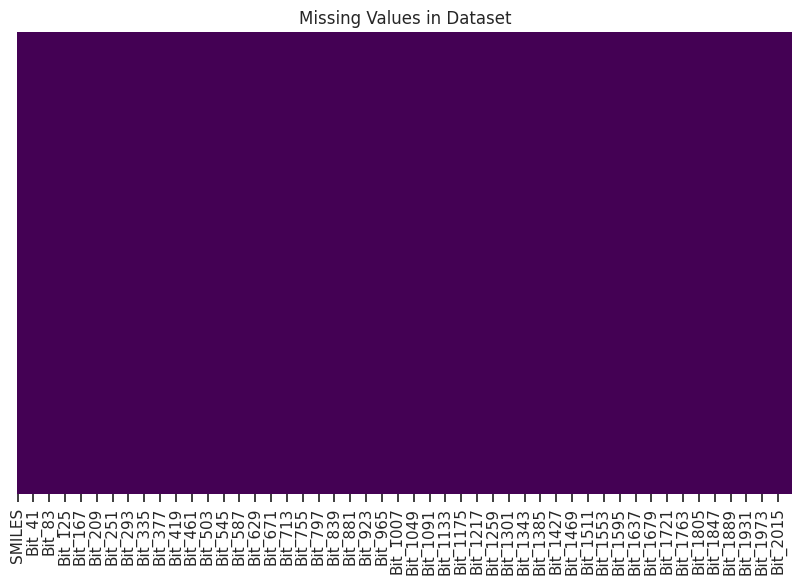

In [ ]:
plot_missing_value(fix)

In [ ]:
fix=fix.dropna()
fix

,SMILES,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047,pIC50,MW,LogP,NumHDonors,NumHAcceptors
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.384050,999.085,-1.4355,13.0,13.0
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,8.698970,893.005,-1.7361,12.0,12.0
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.337242,751.988,2.3535,8.0,9.0
3,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,4.468521,767.987,1.3690,8.0,9.0
4,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,7.698970,717.722,4.3196,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,COc1ccc(C(=O)Nc2cc(F)c(F)c([C@]3(C)C[C@@H](C(F...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.584860,354.402,4.5815,1.0,5.0
8613,Cc1cc(NC(=O)c2ccc(Cl)cn2)cc([C@]2(CF)C[C@@H](C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.420216,587.761,4.9469,3.0,6.0
8614,Cc1cc(NC(=O)c2ccc(C#N)cn2)cc([C@]2(CF)C[C@@H](...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6.040959,545.680,3.8245,4.0,6.0
8615,COc1cnc(C(=O)Nc2cc(C)c(F)c([C@]3(CF)C[C@@H](C(...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.280669,616.803,4.0985,3.0,7.0


## A. Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- Fingerprint
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import PandasTools

#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

## B. Input Dataset & Seleksi Kolom SMILES

In [ ]:
dataset = pd.read_csv('01_label2class_sars.csv')

selection = ['canonical_smiles','pIC50']
dataset = dataset[selection]
dataset.to_csv('input_deskriptor.csv', index=False)

In [ ]:
dataset = pd.read_csv('input_deskriptor.csv')
dataset.head()

,canonical_smiles,pIC50
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242
3,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,4.468521
4,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,7.698970


## C. Menambahkan Kolom Struktur 2D pada Dataframe

,canonical_smiles,pIC50,Structure
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050,
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970,
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242,
3,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,4.468521,
4,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,7.698970,
...,...,...,...
8612,CC(C)=CC(O)C/C(C)=C/COc1c2ccoc2cc2oc(=O)ccc12,4.584860,
8613,CCCN1CCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...,6.420216,
8614,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,6.040959,
8615,COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...,4.280669,

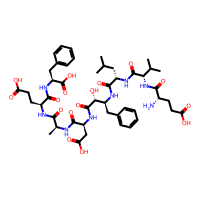
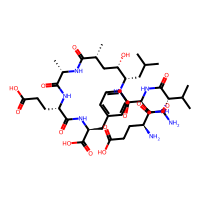
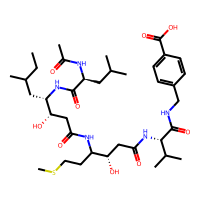
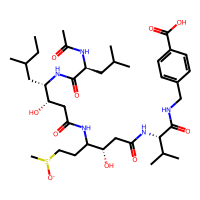
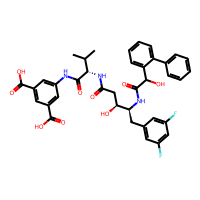
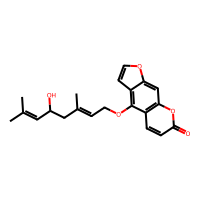
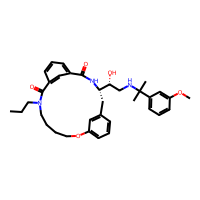
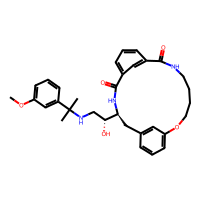
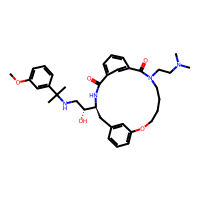
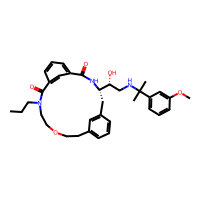

In [ ]:
# Include 2D structure of molecules
# https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/PandasTools.py
PandasTools.AddMoleculeColumnToFrame(dataset,'canonical_smiles', 'Structure')
dataset

## D. Visualisasi SD Bentuk Grid

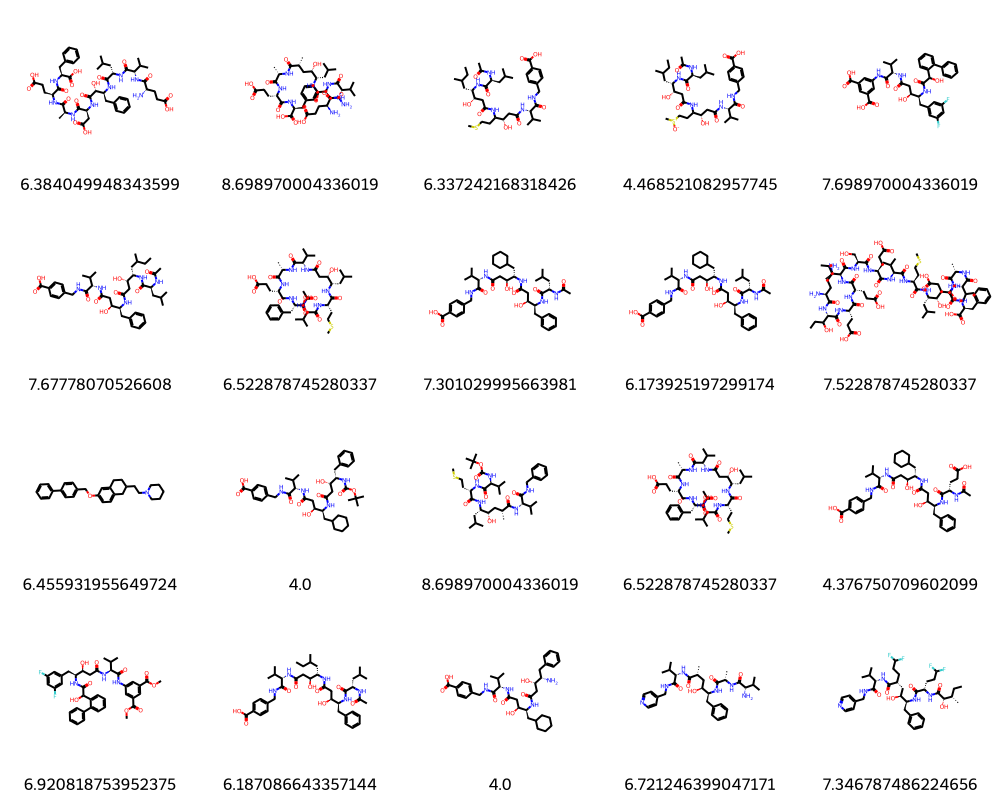

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in dataset["Structure"]][:20], maxMols=100,legends=[str(x) for x in dataset.pIC50], subImgSize=(200,200), molsPerRow=5)

## E. Generate Fingerprint

### 2. Avalon

In [ ]:
Avalon = pyAvalonTools.GetAvalonFP(dataset.Structure[0], nBits=512)

In [ ]:
print("Array bits: /n", np.array(Avalon))
print("Jumlah bits yang digunakan: ",len(Avalon))
print("Ukuran bits MACC: ",np.array(Avalon).shape)
print("Index fingerprint yang aktif: \n",tuple(Avalon.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(Avalon.GetOnBits()))

Array bits: /n [1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0

### 5. Morgan Circular

In [ ]:
onbits = {}
morgan = AllChem.GetMorganFingerprintAsBitVect(dataset.Structure[0], 2, nBits=512, bitInfo=onbits)

[11:40:12] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
print("Array bits: /n", np.array(morgan))
print("Jumlah bits yang digunakan: ",len(morgan))
print("Ukuran bits MORGAN: ",np.array(morgan).shape)
print("Index fingerprint yang aktif: \n",tuple(morgan.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(morgan.GetOnBits()))

Array bits: /n [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0

Visual salah satu finger print yanga aktif pada Bits: 


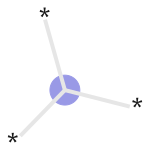

In [ ]:
print("Visual salah satu finger print yanga aktif pada Bits: ")
Draw.DrawMorganBit(dataset.Structure[0], 1, onbits)

Visual semua fingerprint yang aktif pada Bits: 


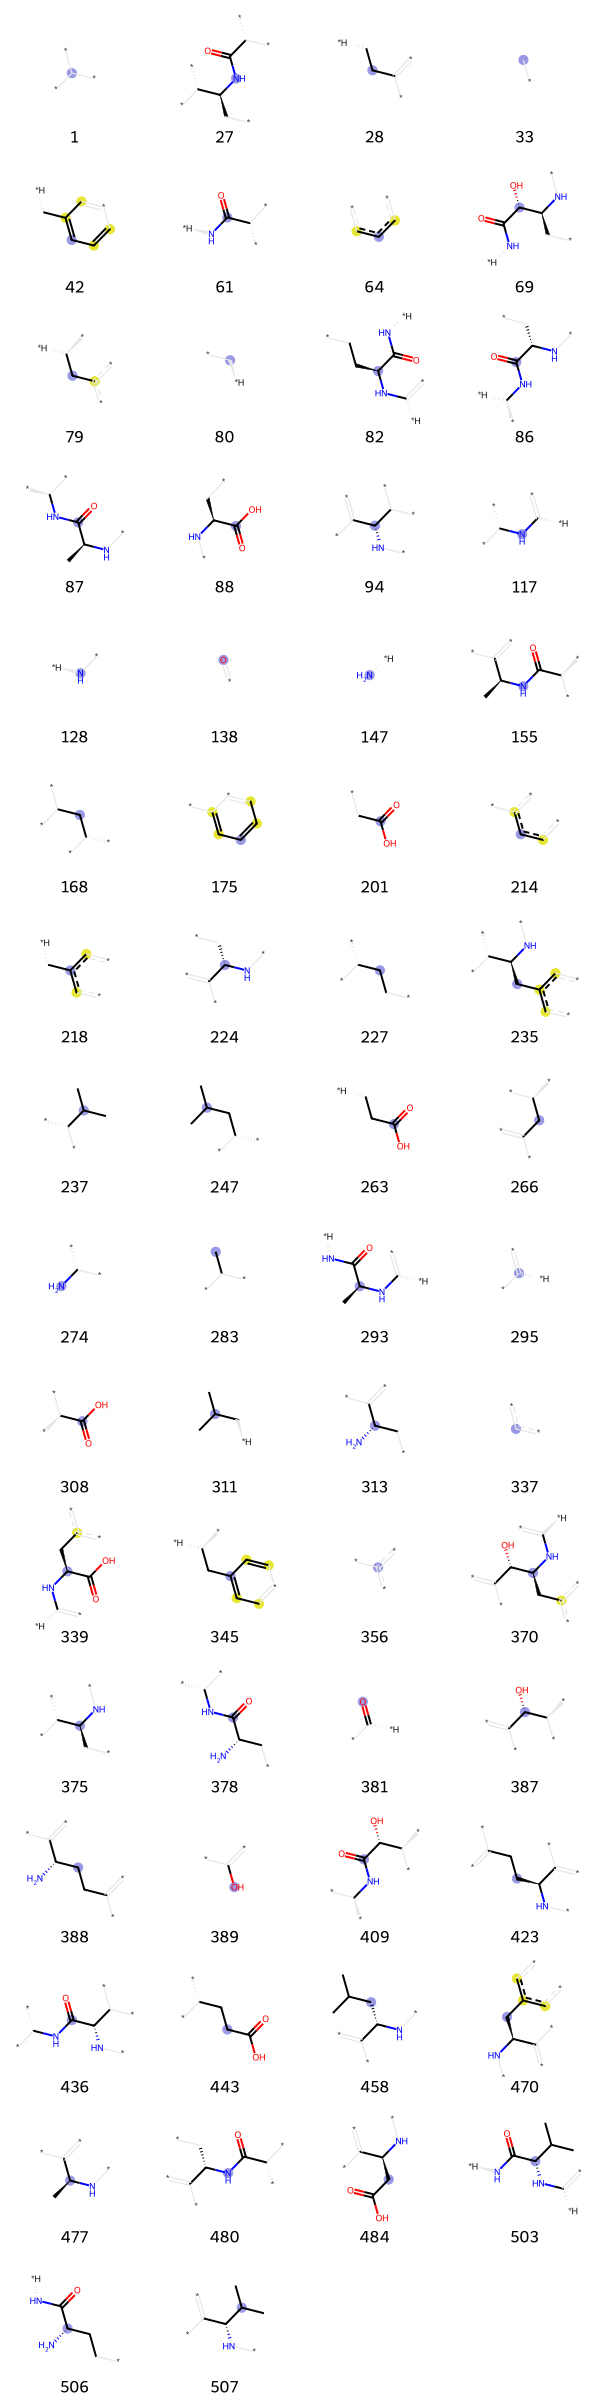

In [ ]:
print("Visual semua fingerprint yang aktif pada Bits: ")
all_fragments = [(dataset.Structure[0], x, onbits) for x in morgan.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in morgan.GetOnBits()][:])

### RDkit

In [ ]:
rdkbi = {}
RDkit = AllChem.RDKFingerprint(dataset.Structure[0], maxPath=5, fpSize=512, bitInfo=rdkbi)

In [ ]:
print("Array bits: /n", np.array(RDkit))
print("Jumlah bits yang digunakan: ",len(RDkit))
print("Ukuran bits RDkit: ",np.array(RDkit).shape)
print("Index fingerprint yang aktif: \n",tuple(RDkit.GetOnBits()))
print("Jumlah fingerprint yang aktif: ",len(RDkit.GetOnBits()))

Array bits: /n [0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 0

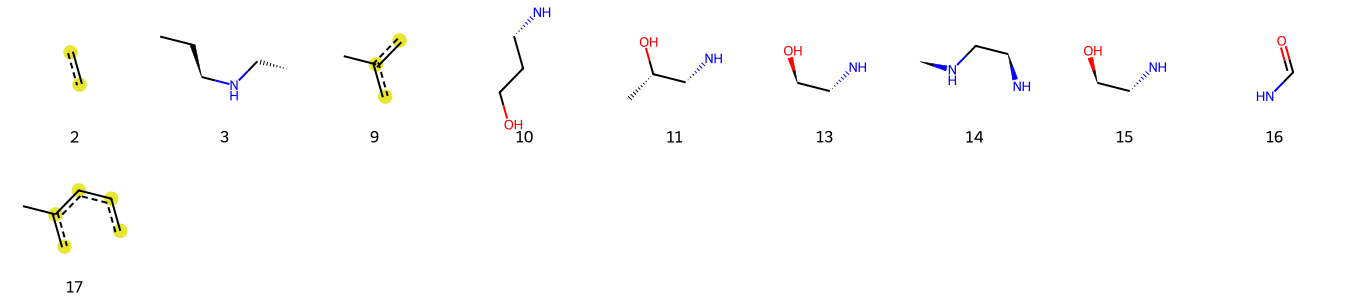

In [ ]:
# Visualize more fragments
fragments = [(dataset.Structure[0], x, rdkbi) for x in rdkbi]
Draw.DrawRDKitBits(fragments[:10],molsPerRow=9,legends=[str(x) for x in rdkbi][:10])

## F. Data Engineering - Set all into function

In [ ]:
# function definition
def generate_fpts(data): #, maxPath=5, fpSize=512, bitInfo=rdkbi):
    # create empty lists to store fingerprints

    # MACCS-keys fingerprint
    Mkeys = []

    # Morgan fingerprint
    Mfpts = []
    morBits ={}

    # Avalon fingerprint
    Avfpts = []

    # Topological Torsion fingerprint
    TT_fpts = []

    # Atom-Pair fingerprint
    APs = []

    # RDKit fingerprnt
    Rdk = []
    rdkBits = {}

    for mol in tqdm(data):
        # Calculation MACCS-keys fingerprints
        mkey = MACCSkeys.GenMACCSKeys(mol)
        Mkeys.append(mkey)

        # Calculate Morgan fingerprints and append to the empty list above
        mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048, bitInfo=morBits)
        Mfpts.append(mfpt)

        # Calculate Avalon fingerprints and append to the empty list above
        Avfpt = pyAvalonTools.GetAvalonFP(mol, nBits=2048)
        Avfpts.append(Avfpt)

        #calculate TopologicalTorsion fingerprints and append to the empty list above
        TT_fpt = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=2048)
        TT_fpts.append(TT_fpt)

        # Calculate Atom-Pair fingerprints
        ap = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=512)
        APs.append(ap)

        # Calculate RDKit fingerprint
        rdk = AllChem.RDKFingerprint(mol, maxPath=5, fpSize=512, bitInfo=rdkBits)
        Rdk.append(rdk)

    return np.array(Mkeys), np.array(Mfpts), np.array(Avfpts), np.array(TT_fpts), np.array(APs), np.array(Rdk), morBits, rdkBits

def output_results():
    print("MACCS-keys fingerprints: ", mkey.shape, ' --- ',"Number of On bits: ",np.count_nonzero(mkey), "\nMorgan fingerprints: ",mfpts.shape, ' --- ',"Number of On bits: ",np.count_nonzero(mfpts), "\nAvalon fingerprints: ", Avfpts.shape, ' --- ',"Number of On bits: ",np.count_nonzero(Avfpts), "\nTopological fingerprints: ",TT_fpts.shape, ' --- ',"Number of On bits: ",np.count_nonzero(TT_fpts), "\nATom Pair fingerprints: ", ap.shape, ' --- ',"Number of On bits: ",np.count_nonzero(ap), "\nRDKit fingerprints: ", rdk.shape, ' --- ',"Number of On bits: ",np.count_nonzero(rdk))

def fragment_Onbit(x): # x = mkey, mfpts, Avfpts, TT_fpts, ap, rdk
    print("Index of On bits:", np.nonzero(x))

### **Call Function**

In [ ]:
# function call on structure
mkey, mfpts, Avfpts, TT_fpts, ap, rdk, morBits, rdkBits  = generate_fpts(dataset.Structure[:3])

# function call all structure
#mkey, mfpts, Avfpts, TT_fpts, ap, rdk, morBits, rdkBits  = generate_fpts(dataset.Structure[:len(dataset)])

  0%|          | 0/3 [00:00<?, ?it/s][11:41:07] DEPRECATION WARNING: please use MorganGenerator
[11:41:07] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[11:41:07] DEPRECATION WARNING: please use AtomPairGenerator
[11:41:07] DEPRECATION WARNING: please use MorganGenerator
[11:41:07] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[11:41:07] DEPRECATION WARNING: please use AtomPairGenerator
[11:41:07] DEPRECATION WARNING: please use MorganGenerator
[11:41:07] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[11:41:07] DEPRECATION WARNING: please use AtomPairGenerator
100%|██████████| 3/3 [00:00<00:00, 131.96it/s]


### **Resume results**

In [ ]:
output_results()

MACCS-keys fingerprints:  (3, 167)  ---  Number of On bits:  141 
Morgan fingerprints:  (3, 2048)  ---  Number of On bits:  204 
Avalon fingerprints:  (3, 2048)  ---  Number of On bits:  547 
Topological fingerprints:  (3, 2048)  ---  Number of On bits:  229 
ATom Pair fingerprints:  (3, 512)  ---  Number of On bits:  1414 
RDKit fingerprints:  (3, 512)  ---  Number of On bits:  745


### **Bits thats contribute to that structure on**

In [ ]:
fragment_Onbit(mfpts)

Index of On bits: (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2]), array([   1,   69,   79,   80,  117,  227,  283,  389,  507,  573,  650,
        680,  726,  736,  739,  759,  786,  807,  851,  857,  890,  900,
        955,  989, 1015, 1018, 1057, 1066, 1088, 1110, 1118, 1141, 1152,
       1171, 1199, 1287, 1290, 1380, 1394, 1399, 1411, 1460, 1482, 1530,
     

### **Draw Morgan On Bit for single structure and single fingerprint**

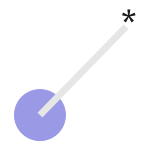

In [ ]:
Draw.DrawMorganBit(dataset.Structure[0], 1, morBits)

### **Draw RDKit On Bit for single structure and single fingerprint**

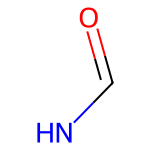

In [ ]:
Draw.DrawRDKitBit(dataset.Structure[0],16,rdkBits)


# **03 - Model**

### Klastering dengan K-Means

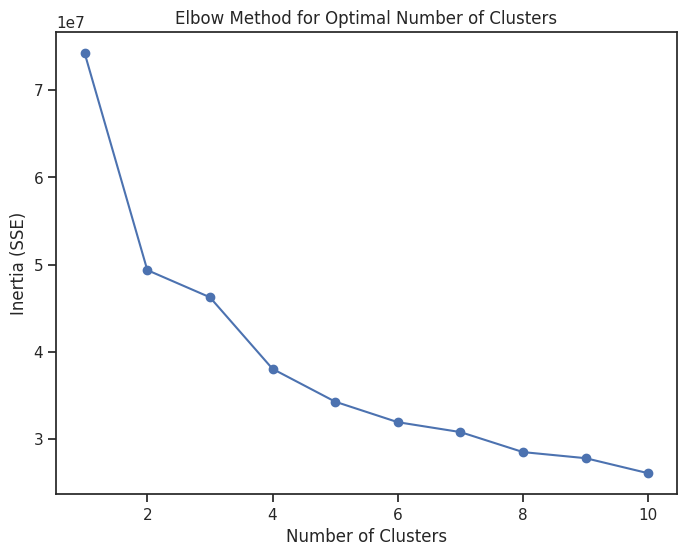

In [ ]:
from sklearn.cluster import KMeans

# Menyusun data untuk visualisasi
X = distance_matrix_scaled
inertia = []

# Mencoba K-means dengan jumlah klaster yang berbeda (1 hingga 10)
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Inertia vs Jumlah Klaster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.show()

In [ ]:
def calculate_fingerprints(dataset):
    fingerprints = []
    for canonical_smiles in dataset['canonical_smiles']:
        mol = Chem.MolFromSmiles(canonical_smiles)
        if mol:
            fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096)
            fingerprints.append(np.array(fingerprint))
        else:
            fingerprints.append(np.zeros(4096))
    return np.array(fingerprints)

# Menghitung fingerprints untuk dataset
fingerprints = calculate_fingerprints(dataset)
distance_matrix = pairwise_distances(fingerprints, metric='euclidean')

# Menstandarkan jarak
scaler = StandardScaler()
distance_matrix_scaled = scaler.fit_transform(distance_matrix)

# Klustering dengan K-means (4 kluster berdasarkan elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(distance_matrix_scaled)
dataset['cluster_label'] = kmeans.labels_
print(dataset[['canonical_smiles', 'cluster_label']].head())
print(dataset['cluster_label'].value_counts())

Output streaming akan dipotong hingga 5000 baris terakhir.
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerator
[13:01:43] DEPRECATION WARNING: please use MorganGenerat

                                    canonical_smiles  cluster_label
0  CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...              1
1  CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...              1
2  CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...              1
3  CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...              1
4  CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...              2
cluster_label
3    3558
0    2494
2    1323
1    1242
Name: count, dtype: int64


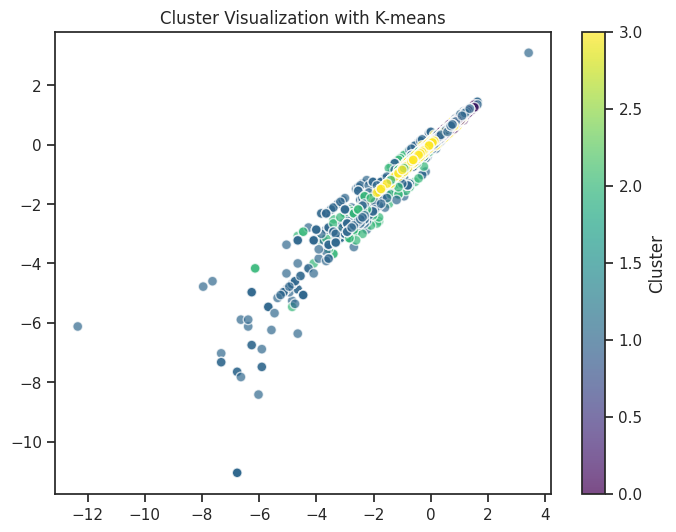

Cluster 0 Senyawa:
                                       canonical_smiles  cluster_label
2371   CN1CC(N)=NC(C)(c2cccc(NC(=O)c3ccc(Cl)cn3)c2)C1=O              0
2372  CN1CC(N)=N[C@@](C)(c2cccc(NC(=O)c3ccc(Cl)cn3)c...              0
2373  CN1CC(N)=N[C@](C)(c2cccc(NC(=O)c3ccc(Cl)cn3)c2...              0
2374  CN1CC(N)=NC(C)(c2cccc(NC(=O)c3ccc(C#N)cn3)c2)C1=O              0
2375   CN1CC(C)(c2cccc(NC(=O)c3ccc(Cl)cn3)c2)N=C(N)C1=O              0
Cluster 1 Senyawa:
                                    canonical_smiles  cluster_label
0  CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...              1
1  CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...              1
2  CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...              1
3  CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...              1
6  CSCC[C@H](NC(=O)[C@@H](NC(C)=O)C(C)C)C(=O)N[C@...              1
Cluster 2 Senyawa:
                                     canonical_smiles  cluster_label
4   CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1c

In [ ]:
X = distance_matrix_scaled
pred = kmeans.labels_

# Plot titik data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis', s=50, alpha=0.7, edgecolors='w', marker='o')
plt.title("Cluster Visualization with K-means")
plt.colorbar(label="Cluster")
plt.show()

# Menampilkan senyawa 4 cluster yang telah terbuat
for cluster_num in range(4):
    cluster_data = dataset[dataset['cluster_label'] == cluster_num]
    print(f"Cluster {cluster_num} Senyawa:")
    print(cluster_data[['canonical_smiles', 'cluster_label']].head())

## Model Klasifikasi senyawa aktif dan tidak aktif menggunakan LGBM Classifier

In [ ]:
# Load dataset
dataset = pd.read_csv('input_deskriptor.csv')
PandasTools.AddMoleculeColumnToFrame(dataset, 'canonical_smiles', 'Stucture', includeFingerprints=True)
dataset.head()

,canonical_smiles,pIC50,Stucture
0,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,6.384050,<rdkit.Chem.rdchem.Mol object at 0x7821f91bd070>
1,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,8.698970,<rdkit.Chem.rdchem.Mol object at 0x7821f91bd150>
2,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,6.337242,<rdkit.Chem.rdchem.Mol object at 0x7821f91bd230>
3,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,4.468521,<rdkit.Chem.rdchem.Mol object at 0x7821f91bd310>
4,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,7.698970,<rdkit.Chem.rdchem.Mol object at 0x7821f91bd3f0>


In [ ]:
# Generate Avalon Fingerprints
def generate_AVfpts(data):
    Avalon_fpts = []
    for mol in tqdm(data):
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=4096)
        Avalon_fpts.append(avfpts)
    return np.array(Avalon_fpts)

Avalon_fpts = generate_AVfpts(dataset['Stucture'])
Avalon_fingerprints = pd.DataFrame(Avalon_fpts, columns=['Col_A_{}'.format(i + 1) for i in range(Avalon_fpts.shape[1])])

# Definisi fitur (X) and target (y)
X = Avalon_fingerprints
threshold = 5
y = (dataset['pIC50'] > threshold).astype(int)  # 1 for active, 0 for inactive

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model Light Gradient Boosting Machine
lgbm_av = LGBMClassifier(n_estimators=50, random_state=42) #menggunakan n = 50
lgbm_av.fit(X_train, y_train)

# Prediksi training dan test
y_train_pred = lgbm_av.predict(X_train)
y_test_pred = lgbm_av.predict(X_test)

# akurasi
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {y_train_accuracy:.2f}')
print(f'Test Accuracy: {y_test_accuracy:.2f}')

100%|██████████| 8617/8617 [00:18<00:00, 469.75it/s]


[LightGBM] [Info] Number of positive: 4953, number of negative: 1078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.160929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5430
[LightGBM] [Info] Number of data points in the train set: 6031, number of used features: 2715
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.821257 -> initscore=1.524886
[LightGBM] [Info] Start training from score 1.524886
Train Accuracy: 0.97
Test Accuracy: 0.93


In [ ]:
X.head()

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_4087,Col_A_4088,Col_A_4089,Col_A_4090,Col_A_4091,Col_A_4092,Col_A_4093,Col_A_4094,Col_A_4095,Col_A_4096
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Cross-validation
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1_weighted', 'roc_auc']
start = time.time()
scores_val = cross_validate(lgbm_av, X, y, scoring=scoring, cv=cv, return_train_score=True)
end = time.time()

[LightGBM] [Info] Number of positive: 4953, number of negative: 1078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.163517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5430
[LightGBM] [Info] Number of data points in the train set: 6031, number of used features: 2715
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.821257 -> initscore=1.524886
[LightGBM] [Info] Start training from score 1.524886
[LightGBM] [Info] Number of positive: 4968, number of negative: 1063
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.254607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5440
[LightGBM] [Info] Number of data points in the train set: 6031, number of used features: 2720
[LightGBM] [Info] [bin

In [ ]:
# Print cross-validation results
print("Accuracy (Cross-Validation): ", round(np.mean(scores_val['test_accuracy']), 2))
print("F1-Score (Cross-Validation): ", round(np.mean(scores_val['test_f1_weighted']), 2))
print("ROC AUC (Cross-Validation): ", round(np.mean(scores_val['test_roc_auc']), 2))
print('Total time required:', round((end - start) / 60, 2), 'min')

Accuracy (Cross-Validation):  0.93
F1-Score (Cross-Validation):  0.93
ROC AUC (Cross-Validation):  0.95
Total time required: 0.43 min


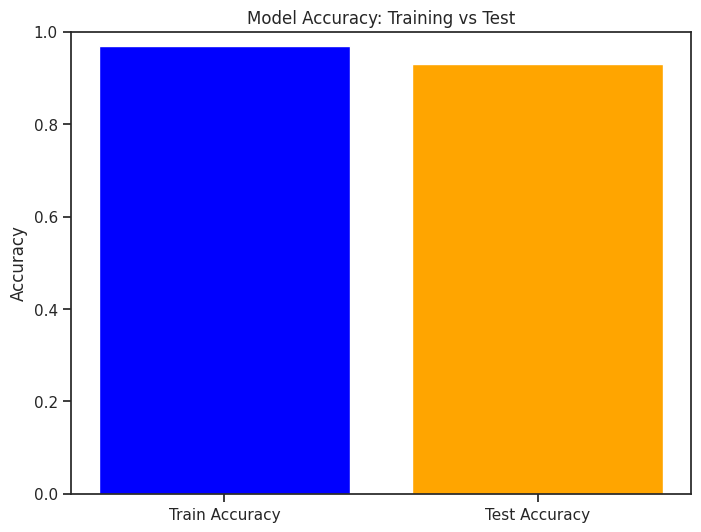

In [ ]:
# Barplot for Train and Test Accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [y_train_accuracy, y_test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Training vs Test')
plt.ylim([0, 1])
plt.show()

In [ ]:
# Fungsi untuk interpretasi prediksi
def interpret_activity(row):
    if row['Model_Prediction'] == 1:
        return 'Aktif'
    else:
        return 'Tidak Aktif'

dataset["Model_Prediction"] = 0  # Inisialisasi dengan nilai 0 (Tidak Aktif)
dataset.loc[X_test.index, "Model_Prediction"] = y_test_pred
dataset["Interpretation"] = dataset.apply(interpret_activity, axis=1)

# Menampilkan hasil dengan kolom interpretasi
print(dataset[["canonical_smiles", "pIC50", "Model_Prediction", "Interpretation"]])

                                       canonical_smiles     pIC50  \
0     CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...  6.384050   
1     CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...  8.698970   
2     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...  6.337242   
3     CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...  4.468521   
4     CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...  7.698970   
...                                                 ...       ...   
8612      CC(C)=CC(O)C/C(C)=C/COc1c2ccoc2cc2oc(=O)ccc12  4.584860   
8613  CCCN1CCCCOc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...  6.420216   
8614  COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...  6.040959   
8615  COc1cccc(C(C)(C)NC[C@@H](O)[C@@H]2Cc3cccc(c3)O...  4.280669   
8616  CCCN1CCOCCc2cccc(c2)C[C@@H]([C@H](O)CNC(C)(C)c...  4.643974   

      Model_Prediction Interpretation  
0                    1          Aktif  
1                    0    Tidak Aktif  
2                    0    Tidak Aktif  
3          

In [ ]:
# Menghitung jumlah molekul yang Aktif dan Tidak Aktif
active_count = dataset[dataset['Interpretation'] == 'Aktif'].shape[0]
inactive_count = dataset[dataset['Interpretation'] == 'Tidak Aktif'].shape[0]
print(f'Jumlah Senyawa Aktif: {active_count}')
print(f'Jumlah Senyawa Tidak Aktif: {inactive_count}')

Jumlah Senyawa Aktif: 2219
Jumlah Senyawa Tidak Aktif: 6398


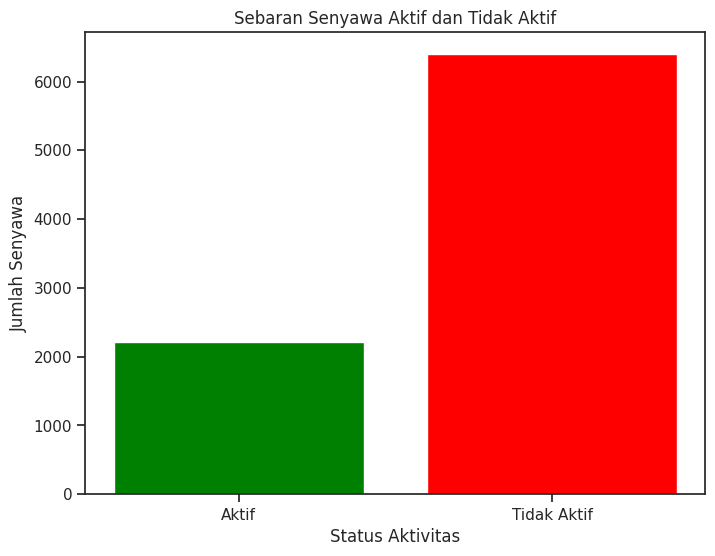

In [ ]:
# Plot
labels = ['Aktif', 'Tidak Aktif']
counts = [active_count, inactive_count]
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Sebaran Senyawa Aktif dan Tidak Aktif')
plt.xlabel('Status Aktivitas')
plt.ylabel('Jumlah Senyawa')
plt.show()